<a href="https://colab.research.google.com/github/hannakb/Neurons-Importance/blob/master/convolution_stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd 'gdrive/My Drive/Neuron Importance/cnn_with_my_utils'

/content/gdrive/My Drive/Neuron Importance/cnn_with_my_utils


In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
# from tqdm.notebook as tqdm
from  tqdm import tqdm_notebook as tqdm
from tqdm import trange

%matplotlib inline

In [0]:
from my_utilities import StatsOneLayer, load_data, train_epoch, calc_acc

In [5]:
train_loader, valid_loader, test_loader = load_data('CIFAR10')

Files already downloaded and verified
Files already downloaded and verified


In [0]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

model = nn.Sequential(
    nn.Conv2d(3, 32, 3), 
    nn.ReLU(),
    nn.Conv2d(32, 32, 3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(32, 32, 3), 
    nn.ReLU(),
    nn.Conv2d(32, 32, 3),
    nn.ReLU(),
    nn.MaxPool2d(2),
    Flatten(),
    nn.Linear(800, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
    nn.Softmax(-1)
)
intermediate_layers = [1, 3, 6, 8, 12]

In [0]:
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()
# n_layers x 3 metrics x n_epoch (it appended)
stats = [[[] for _ in range(3)] for _ in intermediate_layers]
train_accuracy = []
valid_accuracy = []

In [0]:
x, _ = next(iter(train_loader))

In [0]:
oo = model(x).detach()

In [0]:
torch.unique()

In [0]:
torch.mul

In [0]:
n_epoch = 100
for ep_ind in trange(n_epoch):
    # print("Epoch {} / {}".format(ep_ind + 1, n_epoch))
    train_epoch(model.cuda(), train_loader, optimizer, criterion, device='cuda')
    for ind, layer_ind in enumerate(intermediate_layers):
        curr_stats = StatsOneLayer(model[:layer_ind + 1].cpu(), 10, valid_loader)
        stats[ind][0].append(curr_stats.entropy)
        stats[ind][1].append(curr_stats.mi)
        stats[ind][2].append(curr_stats.kl)
        train_accuracy.append(calc_acc(model, train_loader, 'cuda'))
        valid_accuracy.append(calc_acc(model, valid_loader, 'cuda'))
        print("Train accuracy {}, validation accuracy {}".format(
            train_accuracy[-1], valid_accuracy[-1]))



  0%|          | 0/66 [00:00<?, ?it/s]/content/gdrive/My Drive/Neuron Importance/cnn_with_my_utils/my_utilities.py:42: RuntimeWarning: divide by zero encountered in log2
  self.entropy = -np.sum(bins_distribution * np.nan_to_num(np.log2(bins_distribution), neginf=0), axis=-1)
/content/gdrive/My Drive/Neuron Importance/cnn_with_my_utils/my_utilities.py:51: RuntimeWarning: invalid value encountered in true_divide
  np.nan_to_num(np.log2(self.joint_distribution / pairwise_distribution), neginf=0)).sum(-1).sum(-1)
/content/gdrive/My Drive/Neuron Importance/cnn_with_my_utils/my_utilities.py:57: RuntimeWarning: invalid value encountered in true_divide
  self.kl = (target_conditional_distribution * np.nan_to_num(np.log2(target_conditional_distribution / bins_distribution), neginf=0)).sum(-2)


  2%|▏         | 1/66 [00:43<47:03, 43.43s/it]

  3%|▎         | 2/66 [01:26<46:05, 43.22s/it]

  5%|▍         | 3/66 [02:09<45:17, 43.14s/it]

  6%|▌         | 4/66 [02:51<44:28, 43.04s/it]

  8%|▊  

Train accuracy 0.563525, validation accuracy 0.5408




 11%|█         | 7/66 [05:07<43:41, 44.44s/it]

 12%|█▏        | 8/66 [05:51<42:35, 44.06s/it]

 14%|█▎        | 9/66 [06:33<41:26, 43.62s/it]

 15%|█▌        | 10/66 [07:15<40:14, 43.12s/it]

 17%|█▋        | 11/66 [07:57<39:05, 42.64s/it]

 18%|█▊        | 12/66 [08:38<38:02, 42.28s/it]

 20%|█▉        | 13/66 [09:19<36:58, 41.85s/it]

 21%|██        | 14/66 [10:00<35:59, 41.53s/it]

 23%|██▎       | 15/66 [10:40<35:06, 41.31s/it]

In [7]:
!ls

cnn_cifar_model.pkl	 data		  __pycache__
convolution_stats.ipynb  my_utilities.py


In [0]:
import pickle
# with open('cnn_cifar_model.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([model.state_dict(), stats], f)

with open('cnn_cifar_model.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    model_sd, stats = pickle.load(f)

In [9]:
model.load_state_dict(model_sd)

<All keys matched successfully>

In [10]:
calc_acc(model, valid_loader)

0.5697

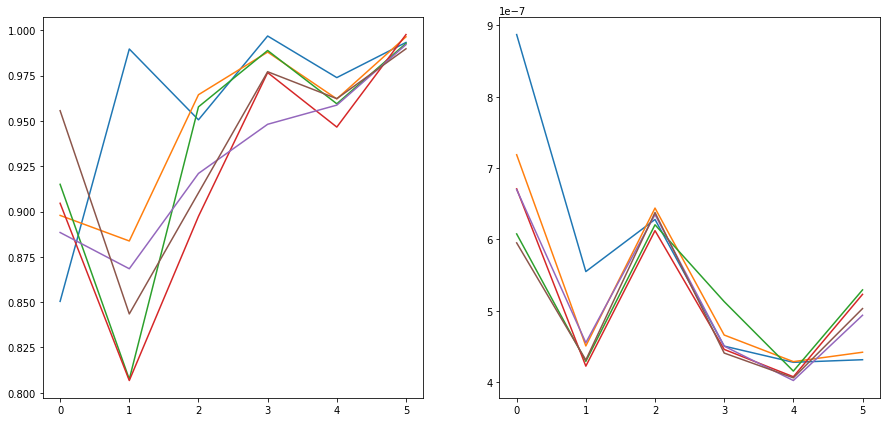

In [35]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1)
for i in range(6):
  plt.plot(np.mean(stats[1][0], -1).mean(-1)[i])
plt.subplot(1, 2, 2)
for i in range(6):
  plt.plot(np.mean(stats[1][1], -1).mean(-1)[i])